In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt





2025-10-29 18:28:09.604560: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-29 18:28:10.070792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-29 18:28:12.160251: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
# Load MNIST dataset
print("Loading MNIST dataset...")
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
# Normalize pixel values to [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape data to add channel dimension (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")


Loading MNIST dataset...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 6s 1us/step
Training data shape: (60000, 28, 28, 1)
Testing data shape: (10000, 28, 28, 1)
Number of classes: 10


In [3]:

# Build CNN model
model = keras.Sequential([
    # First convolutional block
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second convolutional block
    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten and dense layers
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])


/home/no0ne/Documents/machine-learning/navttc/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-29 18:28:49.302576: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [ ]:
# model = keras.Sequential([
#     layers.Conv2D(32, kernal_size=(3,3), activation="relu", input_shape=(28,28,1)),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Conv2D(64, kernal_size=(3,3), activation="relu"),
#     layers.MaxPooling2D(pool_size=(2,2)),
#     layers.Flatten(),
#     layers.Dropout(0.5),
#     layers.Dense(128, activation="relu"),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation="softmax")
    
# ])

In [4]:
# Display model architecture
model.summary()

# Compile model
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Train model
print("\nTraining model...")
history = model.fit(
    x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1,
    verbose=1
)

# Evaluate on test set
print("\nEvaluating on test set...")
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


Training model...
Epoch 1/10


2025-10-29 18:30:54.397828: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 43ms/step - accuracy: 0.8807 - loss: 0.3760 - val_accuracy: 0.9805 - val_loss: 0.0649
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9609 - loss: 0.1284 - val_accuracy: 0.9855 - val_loss: 0.0482
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 41ms/step - accuracy: 0.9706 - loss: 0.0987 - val_accuracy: 0.9888 - val_loss: 0.0386
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9752 - loss: 0.0806 - val_accuracy: 0.9902 - val_loss: 0.0343
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9776 - loss: 0.0749 - val_accuracy: 0.9893 - val_loss: 0.0344
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9794 - loss: 0.0669 - val_accuracy: 0.9910 - val_loss: 0.0305
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9822 - loss: 0.0588 - val_accuracy: 0.9910 - val_loss: 0.0307
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9829 - loss: 0.0567 - val_accurac

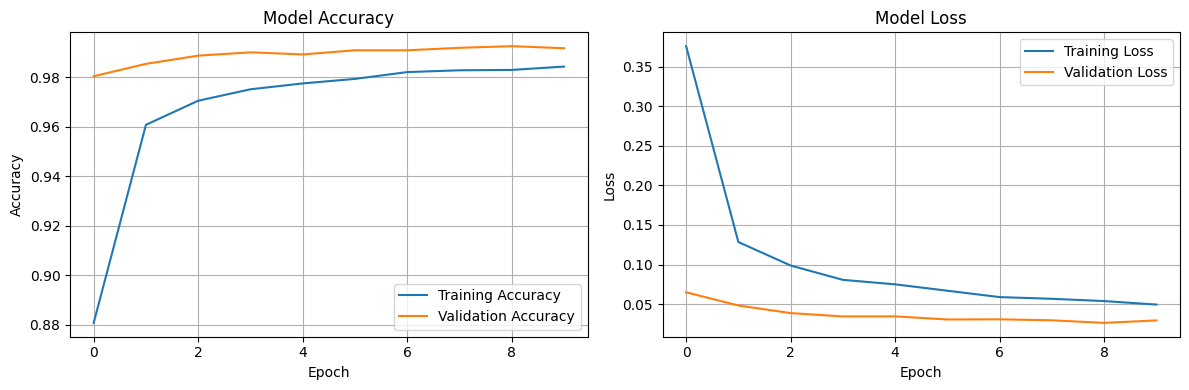

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


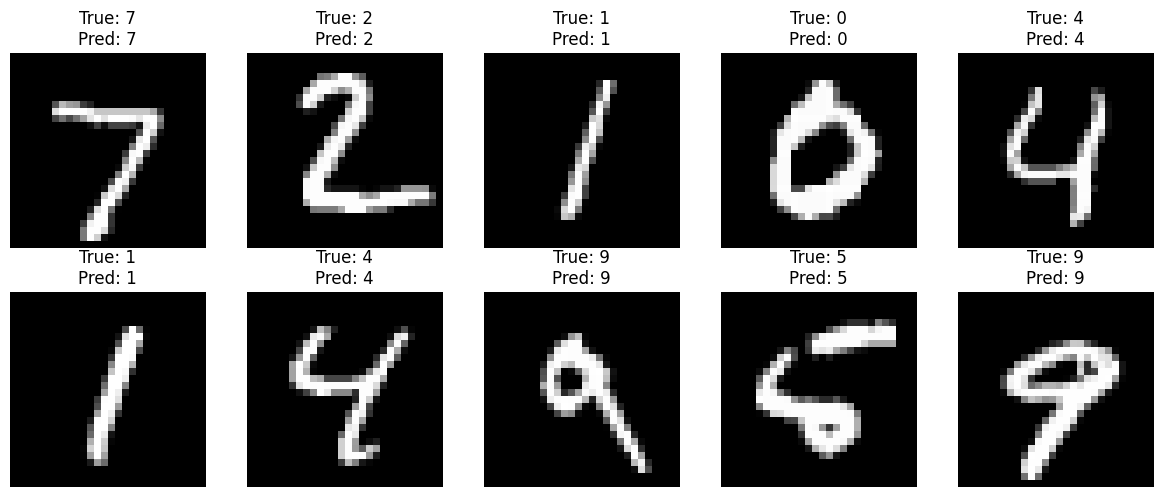


Model saved as 'mnist_cnn_model.h5'
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Confusion Matrix:
[[ 975    1    0    0    0    0    2    1    1    0]
 [   0 1128    3    2    0    0    2    0    0    0]
 [   2    0 1024    0    1    0    0    4    1    0]
 [   0    0    1  998    0    4    0    1    6    0]
 [   0    0    0    0  978    0    3    0    0    1]
 [   2    0    1    4    0  881    4    0    0    0]
 [   3    2    0    0    1    4  948    0    0    0]
 [   0    2    7    1    0    0    0 1016    1    1]
 [   1    0    1    0    1    0    0    0  970    1]
 [   2    2    0    0    9    4    0    2    6  984]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99

In [5]:

# Plot training history
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax1.grid(True)

# Loss plot
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

# Make predictions on a few test samples
num_samples = 10
predictions = model.predict(x_test[:num_samples])
predicted_labels = np.argmax(predictions, axis=1)

# Visualize predictions
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
axes = axes.ravel()

for i in range(num_samples):
    axes[i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[i].set_title(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")
    axes[i].axis('off')
    
    # Color code: green for correct, red for incorrect
    if y_test[i] == predicted_labels[i]:
        axes[i].spines['bottom'].set_color('green')
        axes[i].spines['top'].set_color('green')
        axes[i].spines['left'].set_color('green')
        axes[i].spines['right'].set_color('green')
        axes[i].spines['bottom'].set_linewidth(3)
        axes[i].spines['top'].set_linewidth(3)
        axes[i].spines['left'].set_linewidth(3)
        axes[i].spines['right'].set_linewidth(3)

plt.tight_layout()
plt.show()

# Save the model
model.save('mnist_cnn_model.h5')
print("\nModel saved as 'mnist_cnn_model.h5'")

# Optional: Print confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(x_test), axis=1)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))